In [1]:
import numpy as np
from em_functions import em as em
import polynomial_functions as pfn
import parameters as prm
import data_creation as dc
import pickle
from matplotlib import pyplot as plt
import random 
import matplotlib.cm as cm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML, Image
# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

In [2]:
# load data, noise_3 is data with noise = 0.01
with open('./data/noise_0.pkl','rb') as f:
    allx, allt, x_without_noise, euler_param, sim_param = pickle.load(f)

# picking 10 timeseries and the coarseness of the observed data
# 0::100 for 11 time points
# 0::20 for 51 time points
x = allx[:, 0::20, :] # picking every 20th term to get a total of 51 time points
t = allt[:, 0::20] # 51 time points, coarse data

data_param = prm.data(theta = 0.5 * np.random.rand(prm.dof, prm.dim), gvec = sim_param.gvec)

print("Data shape:", x.shape)
print("Theta shape:", data_param.theta.shape)
print("Theta:", data_param.theta)

Data shape: (10, 51, 1)
Theta shape: (4, 1)
Theta: [[ 0.46584101]
 [ 0.44467544]
 [ 0.40237667]
 [ 0.28134645]]


In [7]:
def animate(i):
    line.set_data(t[:, 0:i], x[:, 0:i, 0])
    return (line,)

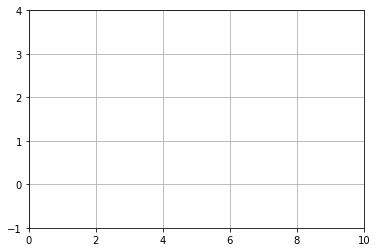

In [8]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()
colors = plt.cm.jet(np.linspace(0, 1, 10))
ax.set_xlim(( np.min(t), np.max(t)))
ax.set_ylim((-1, 4))
line, = ax.plot([], [], 'o', c=colors[0], lw=2)
# line, = ax.plot([], [], '-', c=colors[0], lw=2)
ax.grid()

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

In [9]:
anim = animation.FuncAnimation(fig, animate, frames=50, interval=200, blit=True)
anim